# **Alameda County's 2019 Ethnicity Analysis: Understanding how BART's Transit Oriented Development projects have changed regional ethnic demographics** 

### Analysis by Nicole Matteson

In this data exploration project, I am going to look into Alameda County's ethic demographics by census tracts. I have downloaded the data from censusreporter.org. My partern, Chaithra, is going to conduct the same analysis but from 2011. BART has completed a large array of Transit Oriented Development (TOD) projects throughout the region since the early 2000's, however a large portion of them were completed after 2011. Our goal is to determine if these TOD projects have displaced certain ethnic groups while bringing more White people to the areas near the transit stops. TOD has been criticized for only catering to White folks while systematically gentrifying People of Color. 

First, I will import pandas for general data analysis tasks and also geopandas to read and visualize the spatial data. I will also import contextily to provide basemaps and also matplotlib to create better figures.

In [1]:
import pandas as pd
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import contextily as ctx
import matplotlib.pyplot as plt

Everything loaded perfectly, woohoo! Now I am going to import my data. My data was download as a geoJSON file, which is great because it will allow me to use and analyze spatial data. I'm also going to look at the first couple of lines of the data and get the shape of the dataset.

In [4]:
alameda = gpd.read_file('AlamedaCty_Ethnicity_CensusTract2019.geojson')

In [6]:
alameda.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1833.0,132.0,1475.0,145.0,52.0,48.0,...,12.0,17.0,16.0,55.0,42.0,14.0,25.0,41.0,36.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,4700.0,319.0,3434.0,366.0,459.0,179.0,...,17.0,37.0,60.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
4,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,3522.0,325.0,2554.0,267.0,266.0,168.0,...,12.0,199.0,212.0,58.0,52.0,13.0,21.0,45.0,47.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."


In [8]:
alameda.shape

(362, 45)

I made a few typos which brough up errors, but I fixed them. Now I just want to see if we can plot the dataset as is and see what it will look like.

<AxesSubplot:>

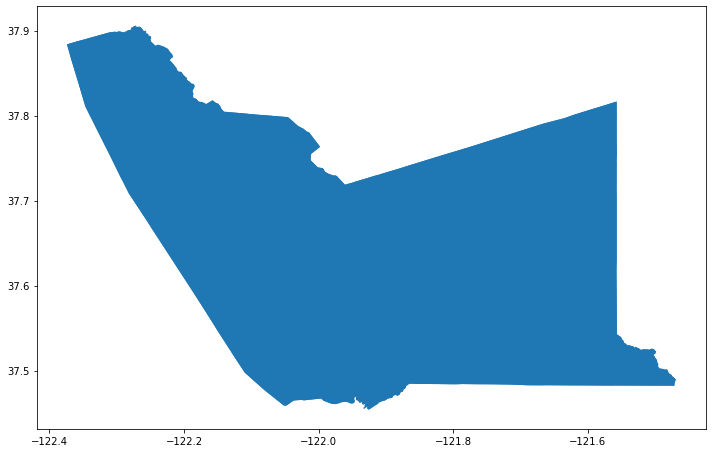

In [9]:
alameda.plot(figsize=(12,12))

Kinda plain and boring, but it shows the boundaries and shape of Alameda County, which is cool. Now I want to see what type of data I have and also see what all the columns are.

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
alameda.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             362 non-null    object  
 1   name              362 non-null    object  
 2   B03002001         362 non-null    float64 
 3   B03002001, Error  362 non-null    float64 
 4   B03002002         362 non-null    float64 
 5   B03002002, Error  362 non-null    float64 
 6   B03002003         362 non-null    float64 
 7   B03002003, Error  362 non-null    float64 
 8   B03002004         362 non-null    float64 
 9   B03002004, Error  362 non-null    float64 
 10  B03002005         362 non-null    float64 
 11  B03002005, Error  362 non-null    float64 
 12  B03002006         362 non-null    float64 
 13  B03002006, Error  362 non-null    float64 
 14  B03002007         362 non-null    float64 
 15  B03002007, Error  362 non-null    float64 
 16  B03002008         

In [11]:
alameda.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
280,14000US06001441921,"Census Tract 4419.21, Alameda, CA",3909.0,317.0,2903.0,285.0,639.0,159.0,262.0,210.0,74.0,62.0,1623.0,352.0,0.0,12.0,9.0,13.0,296.0,176.0,83.0,94.0,213.0,150.0,1006.0,264.0,322.0,156.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,632.0,296.0,52.0,54.0,16.0,21.0,36.0,46.0,"MULTIPOLYGON (((-121.97306 37.54084, -121.9730..."


Now since the first line of data is the county data, which I don't want, I am going to delete that row. I am first going to check again and then I'll delete the row. 

In [13]:
alameda.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,5210.0,310.0,496006.0,2088.0,13277.0,397.0,5407.0,852.0,74220.0,2515.0,4091.0,530.0,70129.0,2411.0,371019.0,0.0,149917.0,4200.0,4583.0,656.0,5910.0,893.0,3376.0,569.0,623.0,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,0.0,12.0,391.0,112.0,0.0,12.0,0.0,12.0,187.0,126.0,0.0,12.0,187.0,126.0,118.0,61.0,77.0,50.0,0.0,12.0,0.0,12.0,7.0,10.0,0.0,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1833.0,132.0,1475.0,145.0,52.0,48.0,4.0,7.0,171.0,69.0,0.0,12.0,0.0,12.0,131.0,67.0,0.0,12.0,131.0,67.0,174.0,78.0,102.0,62.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,17.0,16.0,55.0,42.0,14.0,25.0,41.0,36.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,4700.0,319.0,3434.0,366.0,459.0,179.0,0.0,17.0,590.0,140.0,23.0,39.0,97.0,105.0,97.0,82.0,0.0,17.0,97.0,82.0,351.0,139.0,314.0,134.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,37.0,60.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
4,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,3522.0,325.0,2554.0,267.0,266.0,168.0,35.0,38.0,420.0,133.0,0.0,12.0,0.0,12.0,247.0,113.0,0.0,12.0,247.0,113.0,485.0,238.0,194.0,125.0,25.0,37.0,9.0,16.0,0.0,12.0,0.0,12.0,199.0,212.0,58.0,52.0,13.0,21.0,45.0,47.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."


In [14]:
alameda = alameda.drop([0])
alameda.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,0.0,12.0,391.0,112.0,0.0,12.0,0.0,12.0,187.0,126.0,0.0,12.0,187.0,126.0,118.0,61.0,77.0,50.0,0.0,12.0,0.0,12.0,7.0,10.0,0.0,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1833.0,132.0,1475.0,145.0,52.0,48.0,4.0,7.0,171.0,69.0,0.0,12.0,0.0,12.0,131.0,67.0,0.0,12.0,131.0,67.0,174.0,78.0,102.0,62.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,17.0,16.0,55.0,42.0,14.0,25.0,41.0,36.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,4700.0,319.0,3434.0,366.0,459.0,179.0,0.0,17.0,590.0,140.0,23.0,39.0,97.0,105.0,97.0,82.0,0.0,17.0,97.0,82.0,351.0,139.0,314.0,134.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,37.0,60.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
4,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,3522.0,325.0,2554.0,267.0,266.0,168.0,35.0,38.0,420.0,133.0,0.0,12.0,0.0,12.0,247.0,113.0,0.0,12.0,247.0,113.0,485.0,238.0,194.0,125.0,25.0,37.0,9.0,16.0,0.0,12.0,0.0,12.0,199.0,212.0,58.0,52.0,13.0,21.0,45.0,47.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
5,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,357.0,3734.0,356.0,1874.0,236.0,882.0,202.0,0.0,12.0,446.0,176.0,22.0,33.0,6.0,10.0,504.0,263.0,20.0,21.0,484.0,264.0,390.0,169.0,162.0,115.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,104.0,84.0,124.0,84.0,19.0,22.0,105.0,81.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


Yay it worked! Now I am going to clean up the data. I use the metadata.json to find what the column codes mean. I only want to keep certain rows (White, Black, Asian, Latino), so I am going to clean up the data and only keep the columns I need. I'll also rename them so that it is easier to understand.

In [15]:
list(alameda)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [29]:
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002010',
                   'B03002011',
                   'B03002012',
                   'geometry']

In [31]:
alameda = alameda[columns_to_keep2]
alameda.head()

KeyError: "['B03002001', 'B03002002', 'B03002003', 'B03002004', 'B03002005', 'B03002006', 'B03002007', 'B03002008', 'B03002009', 'B03002010', 'B03002011', 'B03002012'] not in index"

In [25]:
list(alameda)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic Asian',
 'Hispanic',
 'geometry']

In [32]:
list(alameda)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic Asian',
 'Hispanic',
 'geometry']

Alright so, I was first trying to only use the columns for the ethnic groups I wanted to focus on, so I went ahead and took the other ones out and renamed them. Then I realized that I should probably keep the other non-hispanic groups in there so that the math works out, but when I went back to try to change them, I couldn't. So this is a lesson learned that I really should think ahead instead of just going off what comes first to mind. I'll put the code back in that I used to make the original renamed list.

In [33]:
alameda.columns = ['geoid',
                   'name',
                   'Total',
                   'Non Hispanic',
                   'Non Hispanic White',
                   'Non Hispanic Black',
                   'Non Hispanic Asian',
                   'Hispanic',
                   'geometry']
alameda.head()


,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic Asian,Hispanic,geometry
1,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,391.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,171.0,174.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,590.0,351.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
4,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,420.0,485.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
5,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,446.0,390.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


I'm now going to check the integrity of my data to make sure everything adds up. I can do this by using the iloc command which lets you get data from individual cells. Ultimately, I want to check that the Non Hispanic and Hispanic categories add up to the total. I'll start by geting a random record.

In [35]:
random_tract = alameda.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic Asian,Hispanic,geometry
206,14000US06001434000,"Census Tract 4340, Alameda, CA",5334.0,2847.0,729.0,870.0,1003.0,2487.0,"MULTIPOLYGON (((-122.11904 37.69150, -122.1190..."


In [36]:
random_tract.iloc[0]['Total']

5334.0

In [37]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 5334.0


In [38]:
print('Non Hispanic + Hispanic: ' + str(random_tract.iloc[0]['Non Hispanic'] + random_tract.iloc[0]['Hispanic']))

Non Hispanic + Hispanic: 5334.0


In [39]:
print(random_tract.iloc[0]['Non Hispanic'] + 
      random_tract.iloc[0]['Hispanic'])


5334.0


In [40]:
alameda['Total'].head()

1    3120.0
2    2007.0
3    5051.0
4    4007.0
5    4124.0
Name: Total, dtype: float64

In [41]:
alameda['Non Hispanic'].head()

1    3002.0
2    1833.0
3    4700.0
4    3522.0
5    3734.0
Name: Non Hispanic, dtype: float64

In [43]:
alameda['Total'].mean()
alameda['Total'].median()
alameda['Total'].describe()

count      361.000000
mean      4589.346260
std       1778.962549
min          0.000000
25%       3385.000000
50%       4414.000000
75%       5628.000000
max      11119.000000
Name: Total, dtype: float64

In [44]:
alameda['Total'].median()

4414.0

<AxesSubplot:ylabel='Frequency'>

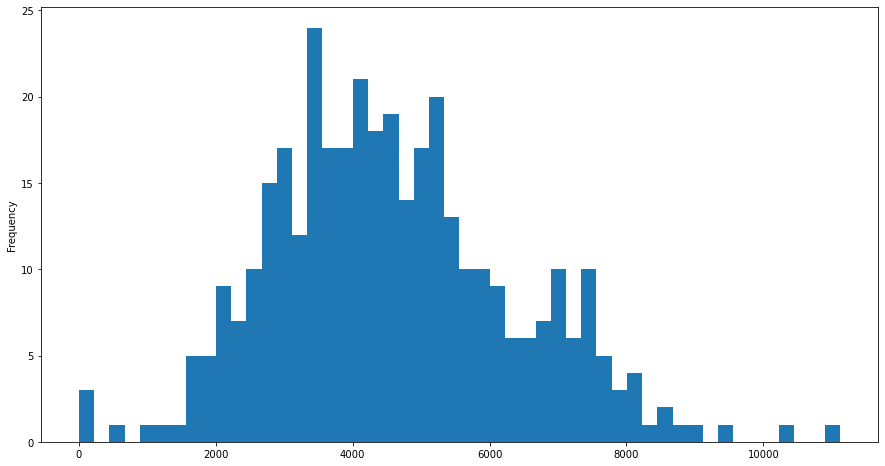

In [46]:
alameda['Total'].plot.hist(figsize=(15,8), bins=50)

<AxesSubplot:ylabel='Frequency'>

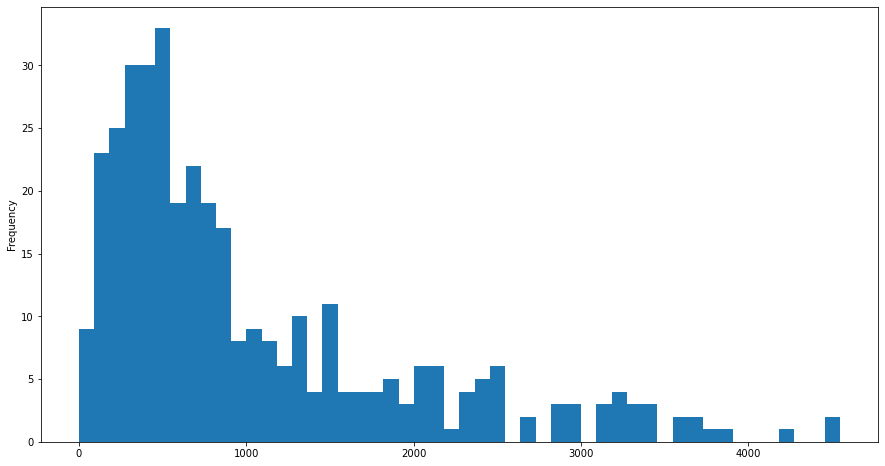

In [47]:
alameda['Hispanic'].plot.hist(figsize=(15,8), bins=50)

These graphs don't really mean much, so now I'm going to sort my data and try to make some meaningful graphs. We can find the census tracts with the most amount of people in general, but also which census tracts have the most of a certain ethnic group. 


In [48]:
alameda_sorted = alameda.sort_values(by='Total',ascending = False)

In [49]:
alameda_sorted[['geoid','Total']].head(10)

,geoid,Total
338,14000US06001450751,11119.0
324,14000US06001450602,10265.0
222,14000US06001436300,9444.0
134,14000US06001422800,9064.0
340,14000US06001451101,8692.0
330,14000US06001450701,8596.0
278,14000US06001441700,8527.0
244,14000US06001438100,8307.0
204,14000US06001433800,8179.0
277,14000US06001441602,8113.0


<AxesSubplot:>

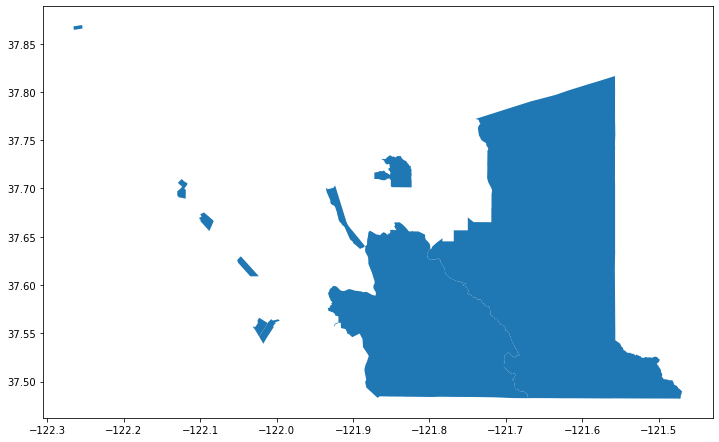

In [50]:
alameda_sorted.head(10).plot(figsize=(12,12))

<AxesSubplot:>

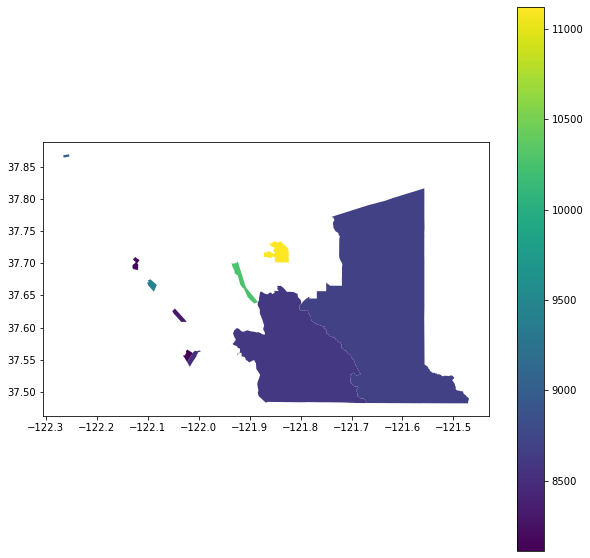

In [51]:
alameda_sorted.head(10).plot(figsize=(10,10),
                          column='Total',
                          legend=True)


Now I want to see which areas have the highest Hispanic populations, so I'll repeat this process but instead of using 'Total' I'll use 'Hispanic'. 

In [52]:
alameda_sorted = alameda.sort_values(by='Hispanic',ascending = False)

In [53]:
alameda_sorted[['geoid','Hispanic']].head(10)

,geoid,Hispanic
222,14000US06001436300,4549.0
77,14000US06001407200,4539.0
251,14000US06001440200,4268.0
226,14000US06001436601,3849.0
230,14000US06001436900,3770.0
91,14000US06001408600,3715.0
204,14000US06001433800,3665.0
313,14000US06001444500,3577.0
92,14000US06001408700,3565.0
98,14000US06001409300,3456.0


<AxesSubplot:>

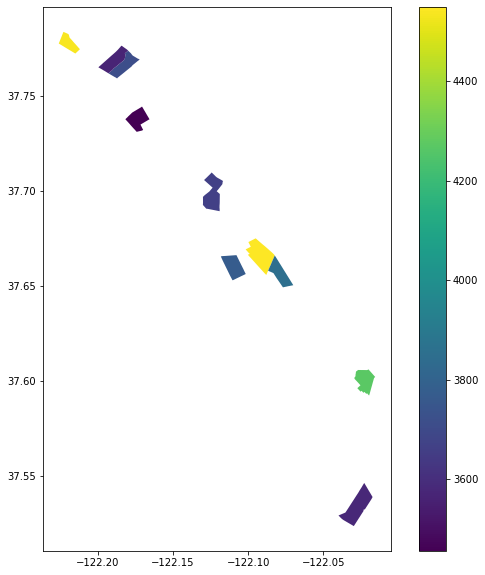

In [54]:
alameda_sorted.head(10).plot(figsize=(10,10),
                          column='Hispanic',
                          legend=True)

That wasn't as great of a graph as I was hoping for. So now I'm going to filter and subset my data and get some more interesting and telling graphs. The first thing I'll need to do is create new columns that have the percentages instead of totals. Percentages are more useful than totals because it includes the scale and is easier to read. 

In [55]:
list(alameda)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic Asian',
 'Hispanic',
 'geometry']

In [56]:
alameda['Percent Non Hispanic'] = alameda['Non Hispanic']/alameda['Total']*100
alameda['Percent Hispanic'] = alameda['Hispanic']/alameda['Total']*100


In [57]:
alameda.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic Asian,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic
353,14000US06001451601,"Census Tract 4516.01, Alameda, CA",5362.0,4790.0,4196.0,9.0,469.0,572.0,"MULTIPOLYGON (((-121.77243 37.68364, -121.7721...",89.332339,10.667661
51,14000US06001405200,"Census Tract 4052, Alameda, CA",5183.0,4362.0,1983.0,466.0,1635.0,821.0,"MULTIPOLYGON (((-122.25060 37.80524, -122.2504...",84.159753,15.840247
171,14000US06001428700,"Census Tract 4287, Alameda, CA",4472.0,3745.0,1226.0,752.0,1461.0,727.0,"MULTIPOLYGON (((-122.34051 37.80166, -122.3326...",83.743292,16.256708
26,14000US06001403000,"Census Tract 4030, Alameda, CA",2905.0,2839.0,189.0,127.0,2366.0,66.0,"MULTIPOLYGON (((-122.27500 37.79842, -122.2749...",97.728055,2.271945
148,14000US06001424001,"Census Tract 4240.01, Alameda, CA",4027.0,3371.0,1886.0,892.0,336.0,656.0,"MULTIPOLYGON (((-122.27912 37.85329, -122.2790...",83.709958,16.290042


In [58]:
alameda['Percent Non Hispanic White'] = alameda['Non Hispanic White']/alameda['Total']*100
alameda['Percent Non Hispanic Black'] = alameda['Non Hispanic Black']/alameda['Total']*100
alameda['Percent Non Hispanic Asian'] = alameda['Non Hispanic Asian']/alameda['Total']*100


In [59]:
alameda.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic Asian,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic Asian
256,14000US06001440307,"Census Tract 4403.07, Alameda, CA",4748.0,3852.0,905.0,224.0,2525.0,896.0,"MULTIPOLYGON (((-122.06077 37.59868, -122.0605...",81.128896,18.871104,19.060657,4.717776,53.180286
34,14000US06001403702,"Census Tract 4037.02, Alameda, CA",1930.0,1741.0,1002.0,290.0,341.0,189.0,"MULTIPOLYGON (((-122.25634 37.80854, -122.2563...",90.207254,9.792746,51.917098,15.025907,17.668394
189,14000US06001432501,"Census Tract 4325.01, Alameda, CA",4854.0,3409.0,824.0,354.0,2023.0,1445.0,"MULTIPOLYGON (((-122.17648 37.71901, -122.1763...",70.230738,29.769262,16.975690,7.292954,41.676967
9,14000US06001400900,"Census Tract 4009, Alameda, CA",2471.0,2080.0,1029.0,711.0,101.0,391.0,"MULTIPOLYGON (((-122.28558 37.83978, -122.2847...",84.176447,15.823553,41.643059,28.773776,4.087414
349,14000US06001451503,"Census Tract 4515.03, Alameda, CA",6182.0,5233.0,3897.0,113.0,839.0,949.0,"MULTIPOLYGON (((-121.76574 37.68428, -121.7657...",84.648981,15.351019,63.037852,1.827887,13.571660


Now that I've got those columns, I can start making some cool graphs that will be much more informative. I'll also try to change the maps so that they look interesting!

<AxesSubplot:>

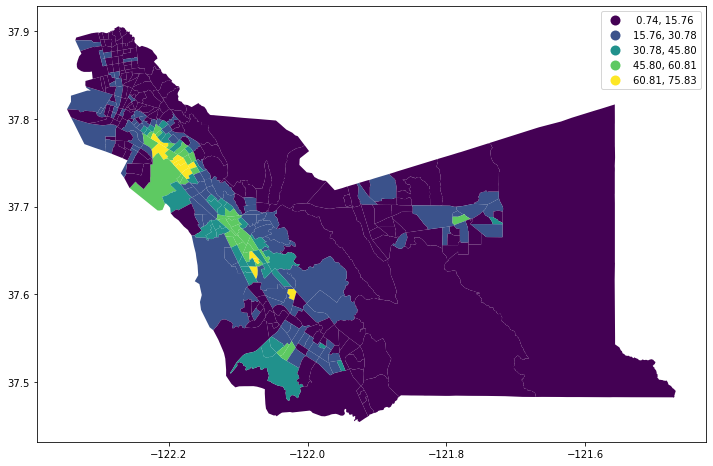

In [60]:
alameda.plot(figsize=(12,12),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')


<AxesSubplot:>

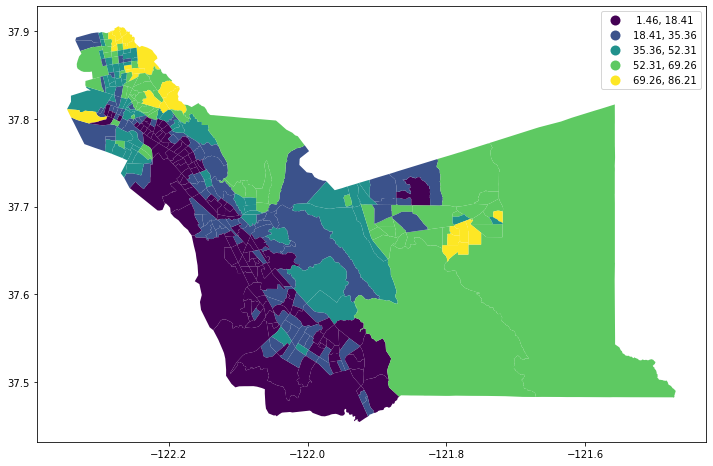

In [61]:
alameda.plot(figsize=(12,12),
                 column='Percent Non Hispanic White',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

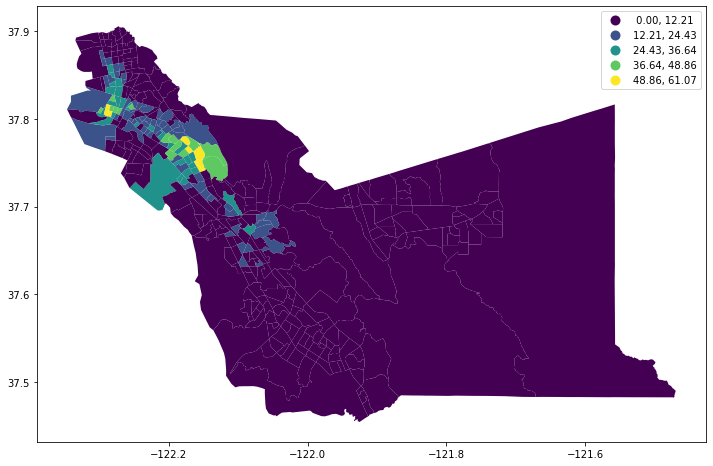

In [62]:
alameda.plot(figsize=(12,12),
                 column='Percent Non Hispanic Black',
                 legend=True, 
                 scheme='equal_interval')

I'm going to change the colors around because I think the map will be more telling that way. First I'll need to import the color options.

In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

<AxesSubplot:>

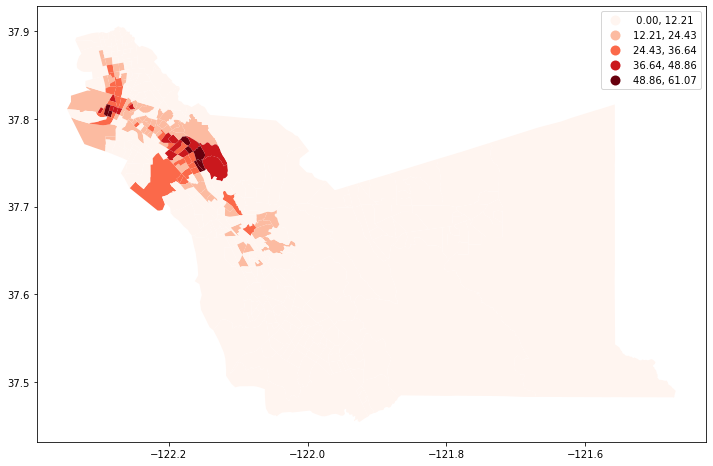

In [65]:
alameda.plot(figsize=(12,12),
                 column='Percent Non Hispanic Black',
                 legend=True, 
                 scheme='equal_interval',
            cmap='Reds'
            )

<AxesSubplot:>

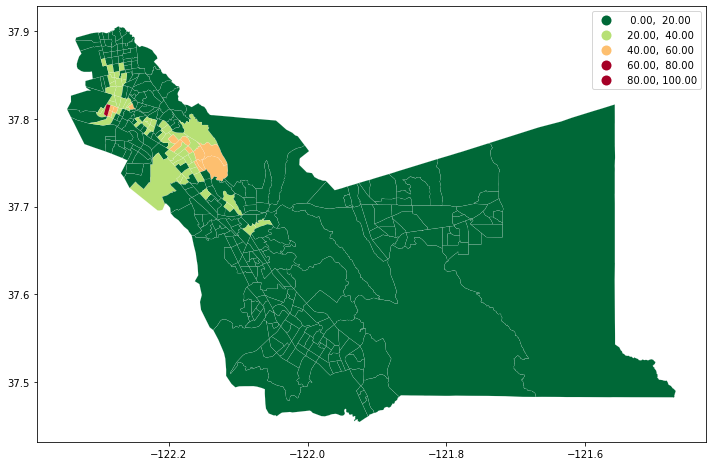

In [67]:
alameda.plot(figsize=(12,12),
            column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='user_defined', 
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0.1, 
            legend=True
            )


<AxesSubplot:>

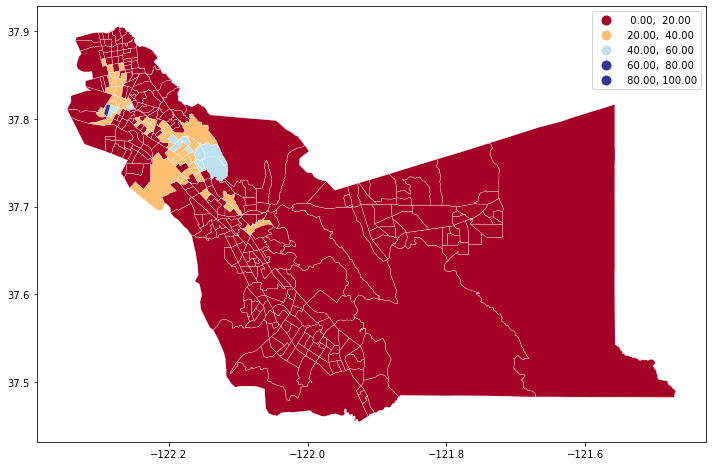

In [72]:
alameda.plot(figsize=(12,12),
            column='Percent Non Hispanic Black', 
            cmap='RdYlBu', 
            scheme='user_defined', 
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0.3, 
            legend=True
            )


Now I'm going to make three side by side maps, and hopefully it will work out. 

Text(0.5, 1.0, 'Percent Non Hispanic Black')

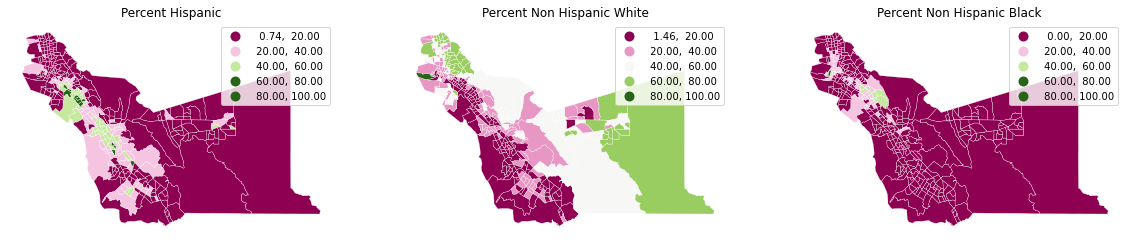

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2, ax3 = axs
alameda.plot(column='Percent Hispanic', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("Percent Hispanic")

alameda.plot(column='Percent Non Hispanic White', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

alameda.plot(column='Percent Non Hispanic Black', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax3, 
            legend=True
           )
ax3.axis("off")
ax3.set_title("Percent Non Hispanic Black")

Yay! It worked! It's kind of small but it worked, so I'm happy. I can adjust the size, but for now this is fine. Now I'm going to make a map with a basemap and look at census tracts with more than 50% Non Hispanic Black. 


<AxesSubplot:>

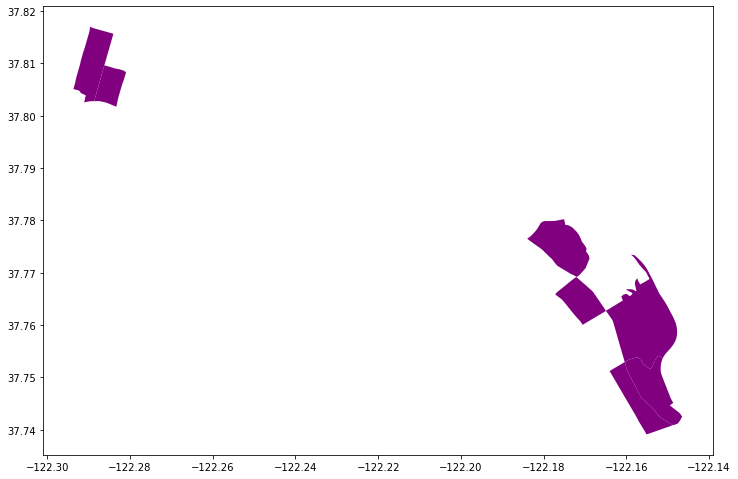

In [76]:
alameda[alameda['Percent Non Hispanic Black'] > 50] 
alameda[alameda['Percent Non Hispanic Black'] > 50].plot(figsize=(12,10),color="purple")

In [79]:
alameda_web_mercator = alameda.to_crs(epsg=3857)

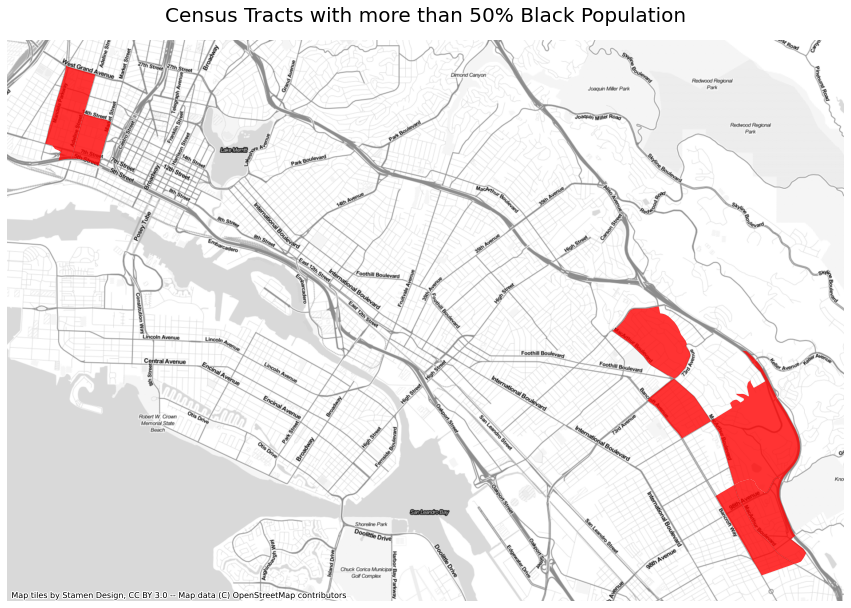

In [80]:
fig, ax = plt.subplots(figsize=(15, 15))
alameda_web_mercator[alameda_web_mercator['Percent Non Hispanic Black'] > 50].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.8
)
ax.axis('off')
ax.set_title('Census Tracts with more than 50% Black Population',fontsize=20,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
